This midterm involves the ‘Heart’ data set that is available on SAS Enterprise Guide, in the  SAS-Help directory.

Please submit responses to the following questions, including plots and analysis, to the Week 2 Midterm.

1. Generate a scatter plot matrix of the following continuous variables:  Briefly explain the relationships that you see.
    
    a.    Height, Weight, Diastolic, Systolic, MRW, Cholesterol  (30 pts)
    
    
2. Use t-tests  to accept or reject the statements listed below. State conclusions using the terminology of hypothesis testing.  (30 pts)
    
    a.    There is no difference in cholesterol levels between males and females.
    
    b.    There is no difference in diastolic blood pressure between males and females.
    
    
3. Provide estimates and standard errors for:  (20 pts)

    a.    Mean  cholesterol for the entire population.
    
    b.    Mean Diastolic blood pressure for the entire population.
    
    
4. Create 2 bi-linear regression models that predict cholesterol level:  (60 pts)

    a.    For the first model,  use a continuous independent variable that exhibits the best correlation with the dependent variable
    
    b.    For the second model, use a continuous variable that exhibits the next best  correlation with the dependent variable
    
    c.    Explain and support the difference between the models from steps (a) and (b)
    
    
5. Create a multiple-regression model that uses all of the continuous variables. (60 pts)

    a. Explain and support the results of the model.
    
    b. Compare the performance of the multiple regression model with the best bi-linear regression model from the question 4 (the bi-linear model)
    
    
Click on the "Week Two Assignment - Midterm" link above to submit your assignment, as well as to get more information regarding the due date and grading rubric.

## Question 1a

In [128]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv("/Users/RyanPaw/ANA620/HEART.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Status          5209 non-null   object 
 1   DeathCause      1991 non-null   object 
 2   AgeCHDdiag      1449 non-null   float64
 3   Sex             5209 non-null   object 
 4   AgeAtStart      5209 non-null   int64  
 5   Height          5203 non-null   float64
 6   Weight          5203 non-null   float64
 7   Diastolic       5209 non-null   int64  
 8   Systolic        5209 non-null   int64  
 9   MRW             5203 non-null   float64
 10  Smoking         5173 non-null   float64
 11  AgeAtDeath      1991 non-null   float64
 12  Cholesterol     5057 non-null   float64
 13  Chol_Status     5057 non-null   object 
 14  BP_Status       5209 non-null   object 
 15  Weight_Status   5203 non-null   object 
 16  Smoking_Status  5173 non-null   object 
dtypes: float64(7), int64(3), object(7

In [3]:
df.head()

,Status,DeathCause,AgeCHDdiag,Sex,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol,Chol_Status,BP_Status,Weight_Status,Smoking_Status
0,Dead,Other,NaN,Female,29,62.50,140.0,78,124,121.0,0.0,55.0,NaN,NaN,Normal,Overweight,Non-smoker
1,Dead,Cancer,NaN,Female,41,59.75,194.0,92,144,183.0,0.0,57.0,181.0,Desirable,High,Overweight,Non-smoker
2,Alive,NaN,NaN,Female,57,62.25,132.0,90,170,114.0,10.0,NaN,250.0,High,High,Overweight,Moderate (6-15)
3,Alive,NaN,NaN,Female,39,65.75,158.0,80,128,123.0,0.0,NaN,242.0,High,Normal,Overweight,Non-smoker
4,Alive,NaN,NaN,Male,42,66.00,156.0,76,110,116.0,20.0,NaN,281.0,High,Optimal,Overweight,Heavy (16-25)


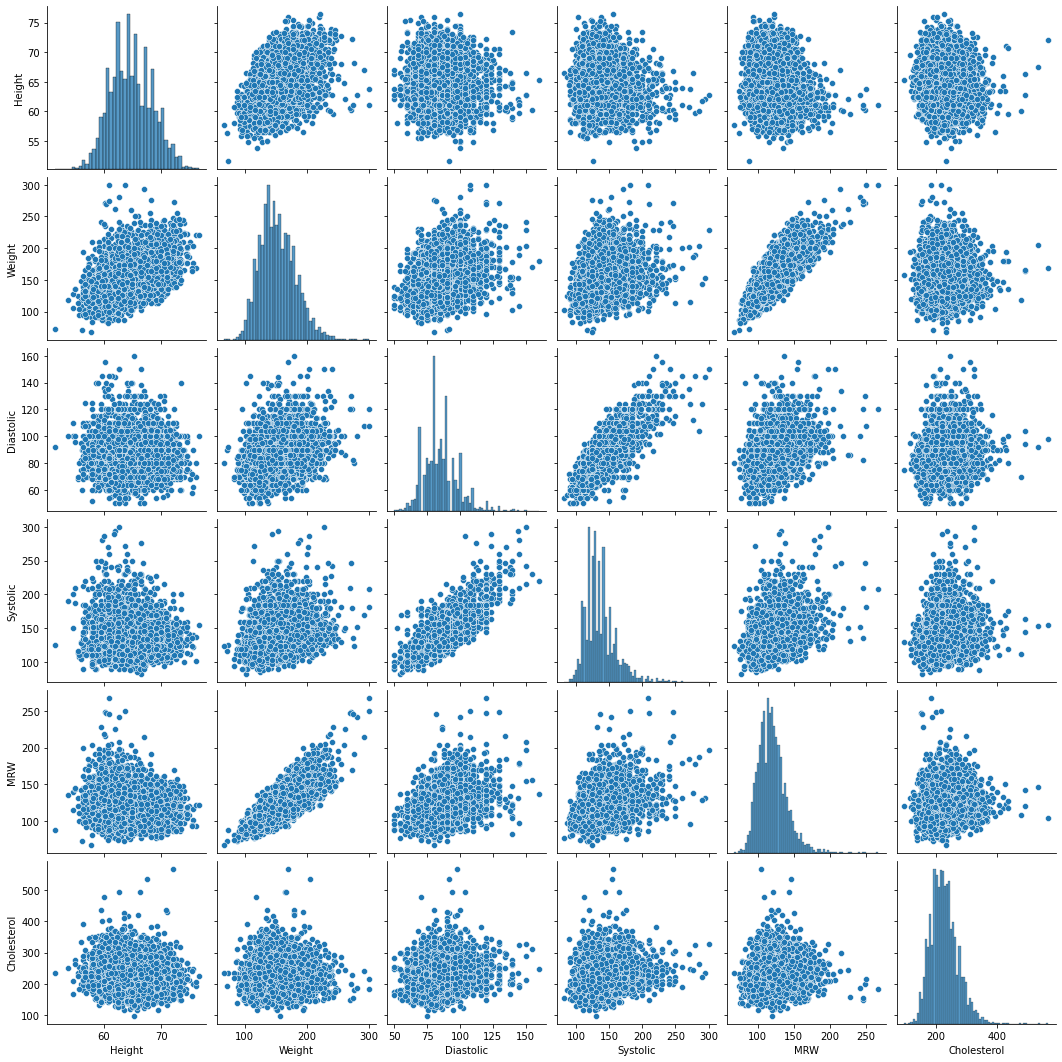

In [120]:
sns.pairplot(df, vars=['Height', 'Weight', 'Diastolic', 'Systolic', 'MRW', 'Cholesterol'], kind="scatter")

In [121]:
df.corr()

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol
AgeCHDdiag,1.000000,0.550909,-0.210416,-0.137415,-0.035105,0.069241,0.006422,-0.283567,0.748112,0.003629
AgeAtStart,0.550909,1.000000,-0.131733,0.093519,0.275401,0.379379,0.204515,-0.167431,0.688605,0.273415
Height,-0.210416,-0.131733,1.000000,0.517385,-0.014245,-0.071127,-0.136289,0.287032,-0.136575,-0.079587
Weight,-0.137415,0.093519,0.517385,1.000000,0.327568,0.263584,0.767171,0.088703,0.004604,0.072428
Diastolic,-0.035105,0.275401,-0.014245,0.327568,1.000000,0.796061,0.385110,-0.064121,0.010039,0.183364
Systolic,0.069241,0.379379,-0.071127,0.263584,0.796061,1.000000,0.362574,-0.092378,0.102174,0.199350
MRW,0.006422,0.204515,-0.136289,0.767171,0.385110,0.362574,1.000000,-0.125237,0.102925,0.137355
Smoking,-0.283567,-0.167431,0.287032,0.088703,-0.064121,-0.092378,-0.125237,1.000000,-0.285249,-0.011780
AgeAtDeath,0.748112,0.688605,-0.136575,0.004604,0.010039,0.102174,0.102925,-0.285249,1.000000,0.078444
Cholesterol,0.003629,0.273415,-0.079587,0.072428,0.183364,0.199350,0.137355,-0.011780,0.078444,1.000000


Height and Weight, Diastolic and Systolic are variables that have a good relationship. In the scatterplot matrix, the values are clustered together and show a positive relationship. This makes sense because Diastolic and Systolic are related when someone's blood pressure is measured. Height and Weight makes sense because they are related when a person's physical characteristics are measured, and generally, taller people are more likely to weigh more than shorter people. 

Metropolitan Relative Weight (MRW) has a good relationship with Weight. This makes sense because both variables are related to a person's relative mass. 

## Question 2a

In [151]:
df2 = df.copy()

In [203]:
df2['Sex'].value_counts()

Female    2873
Male      2336
Name: Sex, dtype: int64

In [152]:
#Impute column mean for 'Cholesterol' because only <1% of values missing
df2['Cholesterol'].fillna((df2['Cholesterol'].mean()), inplace=True)

In [153]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Status          5209 non-null   object 
 1   DeathCause      1991 non-null   object 
 2   AgeCHDdiag      1449 non-null   float64
 3   Sex             5209 non-null   object 
 4   AgeAtStart      5209 non-null   int64  
 5   Height          5203 non-null   float64
 6   Weight          5203 non-null   float64
 7   Diastolic       5209 non-null   int64  
 8   Systolic        5209 non-null   int64  
 9   MRW             5203 non-null   float64
 10  Smoking         5173 non-null   float64
 11  AgeAtDeath      1991 non-null   float64
 12  Cholesterol     5209 non-null   float64
 13  Chol_Status     5057 non-null   object 
 14  BP_Status       5209 non-null   object 
 15  Weight_Status   5203 non-null   object 
 16  Smoking_Status  5173 non-null   object 
dtypes: float64(7), int64(3), object(7

In [154]:
stats.ttest_ind(df2['Cholesterol'][df2['Sex'] == 'Male'],
                df2['Cholesterol'][df2['Sex'] == 'Female'])

Ttest_indResult(statistic=-1.9631431214777235, pvalue=0.04968269582554446)

Before I could conduct a t-test with Cholesterol between Male vs. Females, I noticed that there were 152 values missing (5057 out of 5209) for the 'Cholesterol' variable. Since this was only <1% of values missing, I imputed the mean of the 'Cholesterol' column (227.41) for the missing values. 

The relationship with Cholesterol between Male vs. Females has a calculated t-test of -1.96 and a p-value of 0.05. 

This shows there is NO statistically significant difference between the two variables because of its low t-test score and a p-value <0.05. 

Therefore, we have to ACCEPT the null hypothesis (H0), and reject the alternative hypothesis (H1). 

## Question 2b

In [155]:
stats.ttest_ind(df2['Diastolic'][df2['Sex'] == 'Male'],
                df2['Diastolic'][df2['Sex'] == 'Female'])

Ttest_indResult(statistic=4.402110320612597, pvalue=1.0934778112505913e-05)

The relationship between Diastolic vs. Male/Females have a calculated t-test of 4.41 and a p-value of <0.00001. 

This shows that there is a statistically significant difference between Male and Female diastolic blood pressure.

Therefore, we can reject the null hypothesis (H0), and accept the alternative hypothesis (H1).

## Question 3a

In [156]:
df2['Cholesterol'].mean()

227.41744117065468

In [158]:
from scipy.stats import sem
sem(df2['Cholesterol'])

0.6134521246017728

## Question 3b

In [159]:
df2['Diastolic'].mean()

85.35861009790747

In [160]:
sem(df2['Diastolic'])

0.17974892239489368

## Question 4a

In [189]:
df.corr()

,AgeCHDdiag,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,AgeAtDeath,Cholesterol
AgeCHDdiag,1.000000,0.550909,-0.210416,-0.137415,-0.035105,0.069241,0.006422,-0.283567,0.748112,0.003629
AgeAtStart,0.550909,1.000000,-0.131733,0.093519,0.275401,0.379379,0.204515,-0.167431,0.688605,0.273415
Height,-0.210416,-0.131733,1.000000,0.517385,-0.014245,-0.071127,-0.136289,0.287032,-0.136575,-0.079587
Weight,-0.137415,0.093519,0.517385,1.000000,0.327568,0.263584,0.767171,0.088703,0.004604,0.072428
Diastolic,-0.035105,0.275401,-0.014245,0.327568,1.000000,0.796061,0.385110,-0.064121,0.010039,0.183364
Systolic,0.069241,0.379379,-0.071127,0.263584,0.796061,1.000000,0.362574,-0.092378,0.102174,0.199350
MRW,0.006422,0.204515,-0.136289,0.767171,0.385110,0.362574,1.000000,-0.125237,0.102925,0.137355
Smoking,-0.283567,-0.167431,0.287032,0.088703,-0.064121,-0.092378,-0.125237,1.000000,-0.285249,-0.011780
AgeAtDeath,0.748112,0.688605,-0.136575,0.004604,0.010039,0.102174,0.102925,-0.285249,1.000000,0.078444
Cholesterol,0.003629,0.273415,-0.079587,0.072428,0.183364,0.199350,0.137355,-0.011780,0.078444,1.000000


In [164]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
x1 = df2['AgeAtStart'].values.reshape(-1,1)
y1 = df2['Cholesterol'].values

In [165]:
model1 = LinearRegression()
model1.fit(x1, y1)

LinearRegression()

In [166]:
model1.coef_

array([1.39033812])

In [167]:
model1.intercept_

166.14701003617418

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cholesterol')

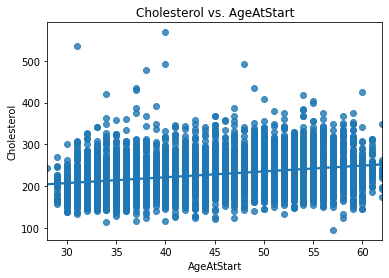

In [168]:
sns.regplot(x1, y1)

plt.title('Cholesterol vs. AgeAtStart')
plt.xlabel('AgeAtStart')
plt.ylabel("Cholesterol")

The variable that has the strongest correlation with Cholesterol is AgeAtStart with a value of 0.273.

The linear regression above compares Cholesterol vs. AgeAtStart. 

## Question 4b

In [169]:
x2 = df2['Systolic'].values.reshape(-1,1)
y2 = df2['Cholesterol'].values

In [170]:
model2 = LinearRegression()
model2.fit(x2, y2)

LinearRegression()

In [171]:
model2.coef_

array([0.36653784])

In [172]:
model2.intercept_

177.2349001501353

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Cholesterol')

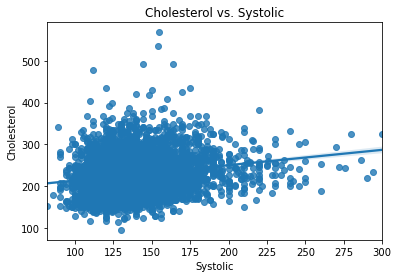

In [191]:
sns.regplot(x2, y2)

plt.title('Cholesterol vs. Systolic')
plt.xlabel('Systolic')
plt.ylabel("Cholesterol")

The variable that is the 2nd strongest correlation with Cholesterol is Systolic with a value of 0.199.

The linear regression above compares Cholesterol vs. Systolic. 

## Question 4c

In [196]:
import statsmodels.formula.api as sm
model_xy1 = sm.ols(formula='y1 ~ x1', data=df2)
fitted_xy1 = model_xy1.fit()
fitted_xy1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     407.1
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           3.19e-87
Time:                        11:10:34   Log-Likelihood:                -26939.
No. Observations:                5209   AIC:                         5.388e+04
Df Residuals:                    5207   BIC:                         5.390e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    166.1470      3.094     53.704      0.000     160.082     172.212
x1             1.3903      0.069     20.176      0.000       1.255       1.525
==============================================================================
Omnibus:                      858.980   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2482.484
Skew:                           0.870   Prob(JB):                         0.00
Kurtosis:                       5.900   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
model_xy2 = sm.ols(formula='y2 ~ x2', data=df2)
fitted_xy2 = model_xy2.fit()
fitted_xy2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     209.2
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           1.62e-46
Time:                        11:11:06   Log-Likelihood:                -27032.
No. Observations:                5209   AIC:                         5.407e+04
Df Residuals:                    5207   BIC:                         5.408e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    177.2349      3.521     50.332      0.000     170.332     184.138
x2             0.3665      0.025     14.464      0.000       0.317       0.416
==============================================================================
Omnibus:                      750.822   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.924
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                       5.318   Cond. No.                         813.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The top 2 strongest correlations with Cholesterol are AgeAtStart (0.273) and Systolic (0.199).
Both models compare Cholesterol as the dependent variable and show a positive, linear relationship. However, AgeAtStart is the stronger variable with Cholesterol, compared to Systolic. 

The AgeAtStart relationship shows that the higher the age group is more likely to have higher cholesterol. The majority of the values range between ages 30-60 and a cholesterol level between 100-500. 

The Systolic relationship shows that the higher the Systolic blood pressure a person has it is more likely to that they have higher cholesterol. The majority of the values range between a systolic blood pressure of 100-225 and a cholesterol level between 100-500. Compared with the AgeAtStart regression, the Systolic values are more saturated together in a cluster. The AgeAtStart values are more spread out in the regression.

## Question 5a

In [174]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Status          5209 non-null   object 
 1   DeathCause      1991 non-null   object 
 2   AgeCHDdiag      1449 non-null   float64
 3   Sex             5209 non-null   object 
 4   AgeAtStart      5209 non-null   int64  
 5   Height          5203 non-null   float64
 6   Weight          5203 non-null   float64
 7   Diastolic       5209 non-null   int64  
 8   Systolic        5209 non-null   int64  
 9   MRW             5203 non-null   float64
 10  Smoking         5173 non-null   float64
 11  AgeAtDeath      1991 non-null   float64
 12  Cholesterol     5209 non-null   float64
 13  Chol_Status     5057 non-null   object 
 14  BP_Status       5209 non-null   object 
 15  Weight_Status   5203 non-null   object 
 16  Smoking_Status  5173 non-null   object 
dtypes: float64(7), int64(3), object(7

In [175]:
#Drop 'DeathCause','AgeCHDdiag','AgeAtDeath' variables due to +60% of values missing
df2 = df2.drop(columns=['DeathCause','AgeCHDdiag','AgeAtDeath'])

In [185]:
#Impute column mean for 'Height','Weight','Smoking','MRW' because only <1% of values missing
df2['Height'].fillna((df2['Height'].mean()), inplace=True)
df2['Weight'].fillna((df2['Weight'].mean()), inplace=True)
df2['Smoking'].fillna((df2['Smoking'].mean()), inplace=True)
df2['MRW'].fillna((df2['MRW'].mean()), inplace=True)

In [205]:
df2['Height'].mean()

64.81318470113396

In [206]:
df2['Weight'].mean()

153.08668076109936

In [207]:
df2['Smoking'].mean()

9.366518461241059

In [208]:
df2['MRW'].mean()

119.95752450509322

In [186]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Status          5209 non-null   object 
 1   Sex             5209 non-null   object 
 2   AgeAtStart      5209 non-null   int64  
 3   Height          5209 non-null   float64
 4   Weight          5209 non-null   float64
 5   Diastolic       5209 non-null   int64  
 6   Systolic        5209 non-null   int64  
 7   MRW             5209 non-null   float64
 8   Smoking         5209 non-null   float64
 9   Cholesterol     5209 non-null   float64
 10  Chol_Status     5057 non-null   object 
 11  BP_Status       5209 non-null   object 
 12  Weight_Status   5203 non-null   object 
 13  Smoking_Status  5173 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 569.9+ KB


In [209]:
df2.corr()

,AgeAtStart,Height,Weight,Diastolic,Systolic,MRW,Smoking,Cholesterol
AgeAtStart,1.000000,-0.131611,0.093452,0.275401,0.379379,0.204366,-0.166904,0.269274
Height,-0.131611,1.000000,0.517230,-0.014242,-0.071104,-0.136242,0.285816,-0.078456
Weight,0.093452,0.517230,1.000000,0.327286,0.263528,0.767171,0.088217,0.071279
Diastolic,0.275401,-0.014242,0.327286,1.000000,0.796061,0.384778,-0.063831,0.180822
Systolic,0.379379,-0.071104,0.263528,0.796061,1.000000,0.362496,-0.091905,0.196532
MRW,0.204366,-0.136242,0.767171,0.384778,0.362496,1.000000,-0.124540,0.134333
Smoking,-0.166904,0.285816,0.088217,-0.063831,-0.091905,-0.124540,1.000000,-0.011614
Cholesterol,0.269274,-0.078456,0.071279,0.180822,0.196532,0.134333,-0.011614,1.000000


In [181]:
X = df2[['AgeAtStart','Height', 'Weight', 'Diastolic', 'Systolic', 'MRW','Smoking']]
Y = df2['Cholesterol'].values

In [182]:
reg = LinearRegression()
reg.fit(X, Y)

LinearRegression()

In [183]:
reg.coef_

array([ 1.17032373, -2.69812087,  0.39868729,  0.23780029,  0.07378202,
       -0.39029898,  0.19122512])

In [184]:
reg.intercept_

304.3112749456002

In [195]:
model_m = sm.ols(formula='Y ~ X', data=df2)
fitted_m = model_m.fit()
fitted_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     76.03
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          2.60e-105
Time:                        11:09:03   Log-Likelihood:                -26881.
No. Observations:                5209   AIC:                         5.378e+04
Df Residuals:                    5201   BIC:                         5.383e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    304.3113     51.903      5.863      0.000     202.559     406.064
X[0]           1.1703      0.075     15.609      0.000       1.023       1.317
X[1]          -2.6981      0.803     -3.360      0.001      -4.272      -1.124
X[2]           0.3987      0.155      2.579      0.010       0.096       0.702
X[3]           0.2378      0.076      3.109      0.002       0.088       0.388
X[4]           0.0738      0.043      1.728      0.084      -0.010       0.157
X[5]          -0.3903      0.193     -2.020      0.043      -0.769      -0.012
X[6]           0.1912      0.052      3.692      0.000       0.090       0.293
==============================================================================
Omnibus:                      845.759   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2440.436
Skew:                           0.858   Prob(JB):                         0.00
Kurtosis:                       5.881   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Before I created the multiple regression model, I had to clean the data first. I dropped the variables:  'DeathCause','AgeCHDdiag','AgeAtDeath' since there were +60% of values missing. I imputed the column mean for 'Height' (64.81),'Weight' (153.09),'Smoking' (9.37),'MRW' (119.95) because only <1% of their values missing. 

This multiple linear regression to explain Cholesterol can be modeled as:

Cholesterol = 304.31 + 1.17 * AgeAtStart  -2.70 * Height + 0.40 * Weight + 0.238 * Diastolic + 0.07 * Systolic -0.39 * MRW + 0.19 * Smoking

The intercept was calculated to be = 304.3112749456002

The coefficient for each variable was calculated to be: 

AgeAtStart = 1.17032373, Height = -2.69812087, Weight = 0.39868729, Diastolic = 0.23780029, Systolic = 0.07378202, MRW = -0.39029898, Smoking = 0.19122512

AgeAtStart has the highest t-value (15.609), which means it shows greater evidence against the null hypothesis. The p-value for all variables, except Systolic, are < 0.05 which shows they are statistically significant. This model has a F-statistic of 76.03, which is a good value that makes this model a good fit for our data. Our R-squared is weak in this model (0.093), which means only 9% of the variation can be explained using this model. 

## Question 5b

In [200]:
#Best Bi-Linear Model - Cholesterol vs. AgeAtStart
model_xy1 = sm.ols(formula='y1 ~ x1', data=df2)
fitted_xy1 = model_xy1.fit()
fitted_xy1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     407.1
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           3.19e-87
Time:                        11:12:31   Log-Likelihood:                -26939.
No. Observations:                5209   AIC:                         5.388e+04
Df Residuals:                    5207   BIC:                         5.390e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    166.1470      3.094     53.704      0.000     160.082     172.212
x1             1.3903      0.069     20.176      0.000       1.255       1.525
==============================================================================
Omnibus:                      858.980   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2482.484
Skew:                           0.870   Prob(JB):                         0.00
Kurtosis:                       5.900   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
#Multiple Regression Model
model3 = sm.ols(formula='Y ~ X', data=df2)
fitted3 = model3.fit()
fitted3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     76.03
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          2.60e-105
Time:                        11:12:51   Log-Likelihood:                -26881.
No. Observations:                5209   AIC:                         5.378e+04
Df Residuals:                    5201   BIC:                         5.383e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    304.3113     51.903      5.863      0.000     202.559     406.064
X[0]           1.1703      0.075     15.609      0.000       1.023       1.317
X[1]          -2.6981      0.803     -3.360      0.001      -4.272      -1.124
X[2]           0.3987      0.155      2.579      0.010       0.096       0.702
X[3]           0.2378      0.076      3.109      0.002       0.088       0.388
X[4]           0.0738      0.043      1.728      0.084      -0.010       0.157
X[5]          -0.3903      0.193     -2.020      0.043      -0.769      -0.012
X[6]           0.1912      0.052      3.692      0.000       0.090       0.293
==============================================================================
Omnibus:                      845.759   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2440.436
Skew:                           0.858   Prob(JB):                         0.00
Kurtosis:                       5.881   Cond. No.                     2.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The best bi-linear model was between Cholesterol vs. AgeAtStart in Question 4. Compared to the multiple regression model, the bi-linear model slightly performs better than the multiple regression model. 

The F-statistic for the bi-linear model (407.1) is greater than the multiple regression model (73.03), which shows it is a better fit for the data. In the multiple regression model, the p-value for the Systolic variable is 0.08, and since it is > 0.05, this variable is not statistically significant and is likely one of the factors impacting the performance of the multiple regression model. 

The multiple regression model has a slightly better R-squared value (0.093), compared to the bi-linear model (0.073). This indicates the multiple regression model has slightly better proportion of variance between its dependent vs. independent variables. However, both R-squared values are low and the advantage for the multiple regression model is minimal. 